# Pokedex - Pokemon Recognition

## Importing Libraries

In [72]:
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import os
import pathlib

## Preprocessing

### Data-set information

In [73]:
len(os.listdir(str(pathlib.Path.cwd() / 'dataset')))

3

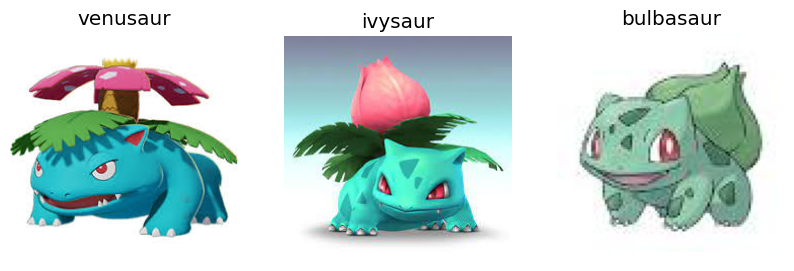

In [74]:

images = [{}]
for i in os.listdir(str(pathlib.Path.cwd() / 'dataset')):
   images.append({"data": str(pathlib.Path.cwd() / 'dataset' / i / np.random.choice(os.listdir(str(pathlib.Path.cwd() / 'dataset' / i)))), "label": i})

fig = plt.figure(figsize=(10, 7))

for i in range(1, 4):
   fig.add_subplot(2, 3, i)
   plt.imshow(plt.imread(images[i]["data"]))
   plt.title(images[i]["label"])
   plt.axis(False)




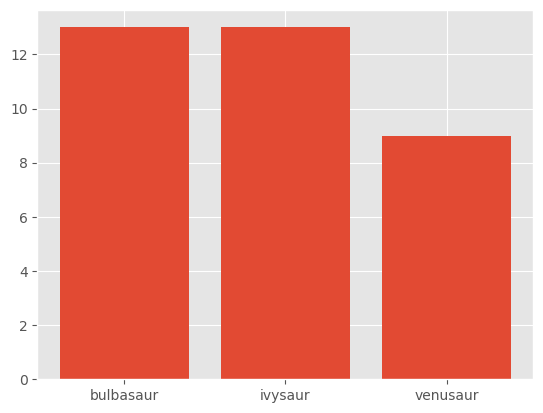

In [75]:
value = [len(os.listdir(str(pathlib.Path.cwd() / 'dataset' / 'bulbasaur'))), len(os.listdir(str(pathlib.Path.cwd() / 'dataset' / 'ivysaur'))), len(os.listdir(str(pathlib.Path.cwd() / 'dataset' / 'venusaur')))]
label = ['bulbasaur', 'ivysaur', 'venusaur']

plt.bar(label, value)
plt.show()


### Create train data

In [76]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    str(pathlib.Path.cwd() / 'dataset'),
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
)

Found 35 files belonging to 3 classes.
Using 28 files for training.


In [77]:
dataset.class_names

['bulbasaur', 'ivysaur', 'venusaur']

In [78]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    str(pathlib.Path.cwd() / 'dataset'),
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
)

Found 35 files belonging to 3 classes.
Using 7 files for validation.


In [79]:
len(dataset.class_names)

3

In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(16, len(dataset.class_names), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, len(dataset.class_names), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, len(dataset.class_names), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(dataset.class_names))
])

In [81]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [82]:
history = model.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=30
)

Epoch 1/30


2023-03-01 18:43:30.922607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 726ms/step - loss: 1.1023 - accuracy: 0.3214 - val_loss: 3.7669 - val_accuracy: 0.5714
Epoch 2/30


2023-03-01 18:43:31.427049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 221ms/step - loss: 3.0501 - accuracy: 0.7500 - val_loss: 0.9571 - val_accuracy: 0.5714
Epoch 3/30
1/1 [==============================] - 0s 180ms/step - loss: 0.7055 - accuracy: 0.7857 - val_loss: 2.6273 - val_accuracy: 0.2857
Epoch 4/30
1/1 [==============================] - 0s 178ms/step - loss: 2.3360 - accuracy: 0.2500 - val_loss: 1.1288 - val_accuracy: 0.5714
Epoch 5/30
1/1 [==============================] - 0s 170ms/step - loss: 0.7746 - accuracy: 0.7143 - val_loss: 0.9123 - val_accuracy: 0.5714
Epoch 6/30
1/1 [==============================] - 0s 173ms/step - loss: 0.5405 - accuracy: 0.8214 - val_loss: 1.0568 - val_accuracy: 0.2857
Epoch 7/30
1/1 [==============================] - 0s 171ms/step - loss: 0.6062 - accuracy: 0.6429 - val_loss: 0.8211 - val_accuracy: 0.7143
Epoch 8/30
1/1 [==============================] - 0s 171ms/step - loss: 0.4101 - accuracy: 0.8214 - val_loss: 0.7170 - val_accuracy: 0.7143
Epoch 9/30
1/1 [===============

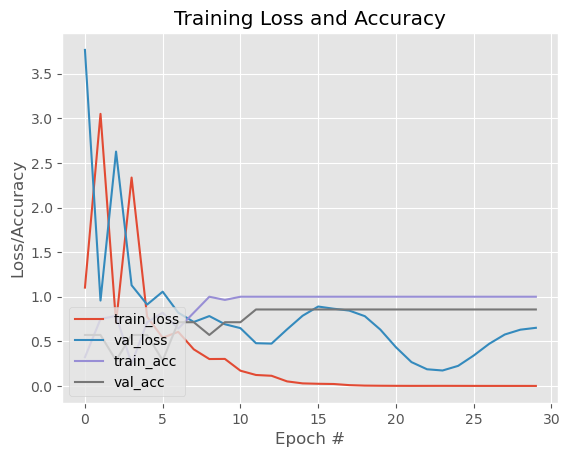

In [83]:
# plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history["loss"])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history["val_loss"])), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, len(history.history["accuracy"])), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(history.history["val_accuracy"])), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("ressources/plot.png")

In [84]:
img = tf.keras.preprocessing.image.load_img(
    str(pathlib.Path.cwd() / 'test.jpeg'),
    color_mode='rgb',
    target_size=(256, 256),
    interpolation='bilinear'
)

In [85]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [86]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(score)

1/1 [==============================] - 0s 56ms/step
tf.Tensor([9.9996400e-01 3.3005699e-06 3.2625416e-05], shape=(3,), dtype=float32)


2023-03-01 18:43:37.021909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


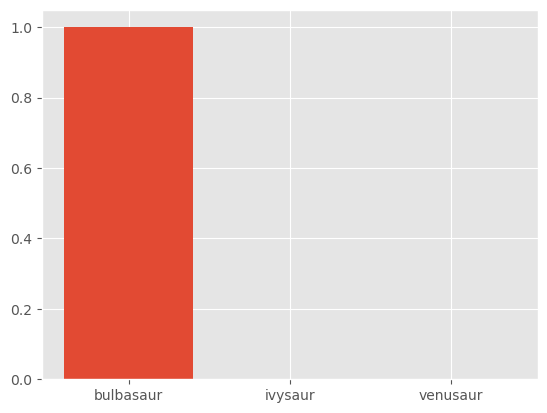

In [87]:
# plot result
plt.bar(dataset.class_names, score)
plt.show()

In [125]:
best_score = np.argmax(score)

In [131]:
# bulbasaur pokedex description
bulbasaur = {"description": "Bulbasaur can be seen napping in bright sunlight.\nThere is a seed on its back.\nBy soaking up the sun's rays, the seed grows progressively larger.", "type": "grass", "height": "2'04\"", "weight": "15.2 lbs", "abilities": "overgrow", "weakness": "fire", "evolution": "ivysaur"}

In [132]:
# ivysaur pokedex description
ivysaur = {"description": "There is a bud on this Pokémon's back.\nTo support its weight, Ivysaur's legs and trunk grow thick and strong.\nIf it starts spending more time lying in the sunlight, it's a sign that the bud will bloom into a large flower soon.", "type": "grass", "height": "3'03\"", "weight": "28.7 lbs", "abilities": "overgrow", "weakness": "fire", "evolution": "venusaur"}

In [133]:
# venusaur pokedex description
venusaur = {"description": "There is a large flower on Venusaur's back.\nThe flower is said to take on vivid colors if it gets plenty of nutrition and sunlight.\nThe flower's aroma soothes the emotions of people.", "type": "grass", "height": "6'07\"", "weight": "220.5 lbs", "abilities": "overgrow", "weakness": "fire", "evolution": "none"}

In [134]:
pokedex = [bulbasaur, ivysaur, venusaur]

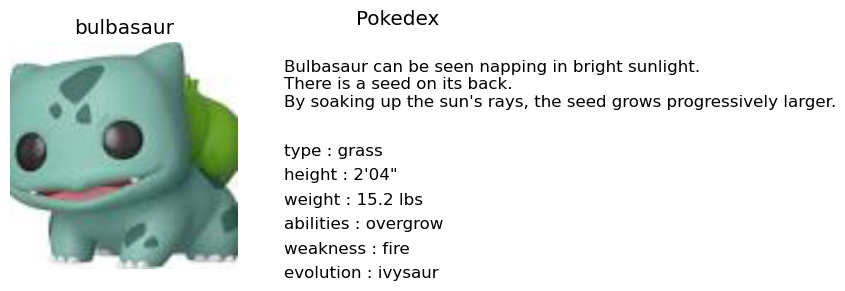

In [214]:
# pokedex vizualisation plot

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2, 3, 1)
# best score image
plt.imshow(img)
plt.title(dataset.class_names[best_score])
plt.axis(False)


fig.add_subplot(2, 3, 2)
plt.text(0, 0.7, pokedex[best_score]["description"], fontsize=12)
plt.axis(False)
plt.text(0, 0.5, "type : " + pokedex[best_score]["type"], fontsize=12)
plt.text(0, 0.4, "height : " + pokedex[best_score]["height"], fontsize=12)
plt.text(0, 0.3, "weight : " + pokedex[best_score]["weight"], fontsize=12)
plt.text(0, 0.2, "abilities : " + pokedex[best_score]["abilities"], fontsize=12)
plt.text(0, 0.1, "weakness : " + pokedex[best_score]["weakness"], fontsize=12)
plt.text(0, 0, "evolution : " + pokedex[best_score]["evolution"], fontsize=12)
plt.title("Pokedex")
plt.axis(False)
plt.show()
